## Import Libraries and Data

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Bank_Customer_retirement.csv")

In [3]:
data

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [5]:
data.isnull().any()

Customer ID     False
Age             False
401K Savings    False
Retire          False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Customer ID     500 non-null int64
Age             500 non-null float64
401K Savings    500 non-null float64
Retire          500 non-null int64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


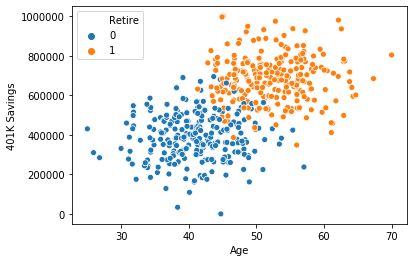

In [8]:
sns.scatterplot(x='Age' , y='401K Savings' , data=data, hue='Retire')

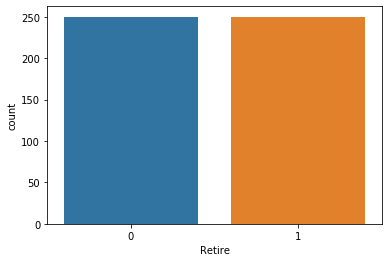

In [11]:
sns.countplot(data['Retire'])

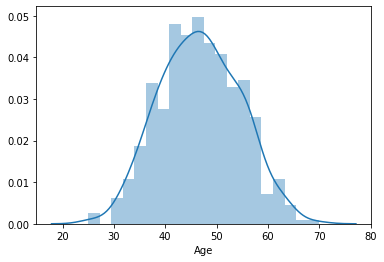

In [12]:
sns.distplot(data['Age'] , bins=20)

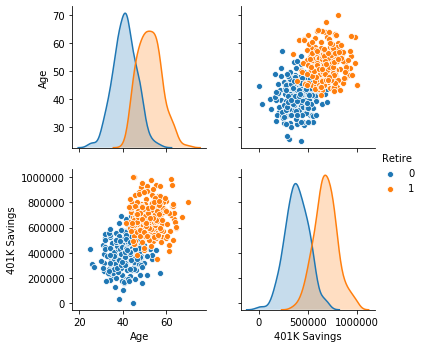

In [17]:
sns.pairplot(data=data , hue='Retire' , vars=['Age','401K Savings'])

In [18]:
data.corr()

,Customer ID,Age,401K Savings,Retire
Customer ID,1.000000,0.023269,0.014708,-0.009228
Age,0.023269,1.000000,0.584608,0.729934
401K Savings,0.014708,0.584608,1.000000,0.777673
Retire,-0.009228,0.729934,0.777673,1.000000


## creating test and train dataframes

In [22]:
customer_det=data.drop(['Retire', 'Customer ID'] , axis=1)

In [23]:
customer_det.head()

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723


In [24]:
ret=data['Retire']

In [41]:
ret

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [42]:
X_train , X_test , y_train , y_test =train_test_split(customer_det, ret , test_size = 0.20, random_state=5)

In [43]:
X_train.shape

(400, 2)

In [44]:
X_test.shape

(100, 2)

In [45]:
y_train.shape

(400,)

In [46]:
y_test.shape

(100,)

## applying SVM 

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
svm_model= SVC()

In [49]:
svm_model.fit(X_train,y_train)

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_predict=svm_model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, y_predict)

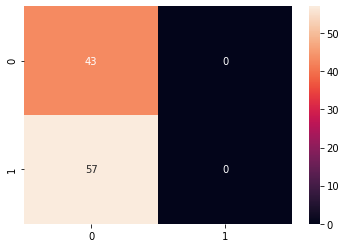

In [52]:
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

    accuracy                           0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Applying Scaling and Normalization to get good results

## using standard scaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
y_predict=svc_model.predict(X_test_scaled)

In [59]:
cm=confusion_matrix(y_test, y_predict)

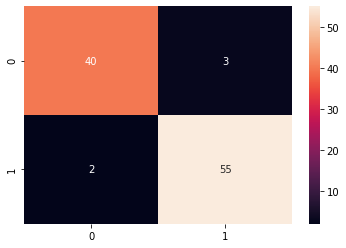

In [60]:
sns.heatmap(cm,annot=True)

In [61]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## using MinMax Scaler

In [62]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

In [63]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
svc_model = SVC()
svc_model.fit(X_train_scaled ,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
y_predict=svc_model.predict(X_test_scaled)

In [66]:
cm=confusion_matrix(y_test, y_predict)

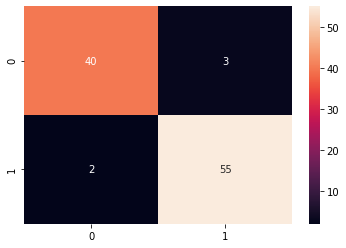

In [67]:
sns.heatmap(cm,annot=True)

In [68]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## using range func

In [69]:
min_train = X_train.min()
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [71]:
train_range=(X_train-X_train.min()).max()

In [73]:
X_train_scaled = (X_train - min_train)/train_range

In [74]:
X_train_scaled

,Age,401K Savings
247,0.488640,0.684860
390,0.731713,0.651642
186,0.636117,0.669911
484,0.544773,0.718011
139,0.455655,0.363796
...,...,...
486,0.315494,0.033828
189,0.281290,0.374391
495,0.512265,0.704240
206,0.510404,0.626791


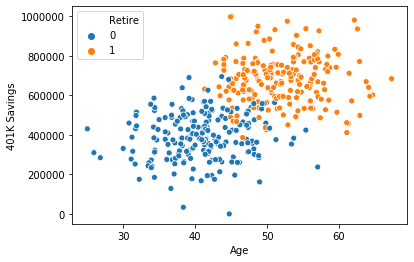

In [80]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)

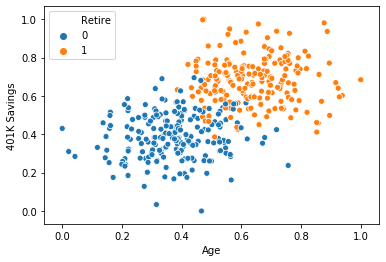

In [81]:
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [84]:
svc_model=SVC()

In [85]:
svc_model.fit(X_train_scaled, y_train)

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [86]:
test_range=(X_test-X_test.min()).max()

In [87]:
test_min=X_test.min()

In [88]:
X_test_scaled = (X_test - test_min)/test_range

In [90]:
y_predict=svc_model.predict(X_test_scaled)

In [91]:
cm=confusion_matrix(y_test, y_predict)

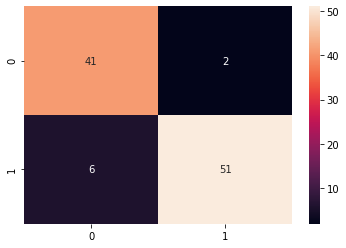

In [92]:
sns.heatmap(cm, annot=True)

In [93]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.89      0.93        57

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



## using C and Gamma function

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 


In [105]:
grid=GridSearchCV(SVC(),param_grid ,refit=True , verbose=4 )

grid.fit(X_train_scaled,y_train)

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.955, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.962, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.925, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.515, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.519, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [106]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [107]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [109]:
grid_predictions = grid.predict(X_test_scaled)
cm=confusion_matrix(y_test, grid_predictions)

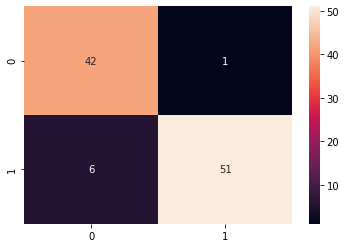

In [110]:
sns.heatmap(cm,annot=True)

In [111]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

